<a href="https://colab.research.google.com/github/AFBA1993/DeepLearningTutorials/blob/main/RNNLSTM/petr4_recorrente_multiplas_saidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base = pd.read_csv('/content/drive/MyDrive/UdemyDeepCSVs/petr4_treinamento.csv')
base = base.dropna()
base_treinamento = base.iloc[:, 1:2].values
base_valor_maximo = base.iloc[:, 2:3].values

In [3]:
normalizador = MinMaxScaler(feature_range = (0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
base_valor_maximo_normalizado = normalizador.fit_transform(base_valor_maximo)

In [4]:
previsores = []
preco_real1 = []
preco_real2 = []
for i in range(90, 1242):
  previsores.append(base_treinamento_normalizada[i-90:i,0])
  preco_real1.append(base_treinamento_normalizada[i, 0])
  preco_real2.append(base_valor_maximo_normalizado[i, 0])

In [5]:
previsores, preco_real1, preco_real2 = np.array(previsores), np.array(preco_real1), np.array(preco_real2)

In [6]:
previsores = np.reshape(previsores, 
                        (previsores.shape[0], previsores.shape[1],1))

In [7]:
preco_real = np.column_stack((preco_real1, preco_real2))

In [8]:
previsores.shape

(1152, 90, 1)

In [9]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, 
                   input_shape = (previsores.shape[1],1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 2, activation = 'linear'))

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32)

Epoch 1/100
36/36 [==============================] - 12s 176ms/step - loss: 0.0346 - mean_absolute_error: 0.1383
Epoch 2/100
36/36 [==============================] - 6s 176ms/step - loss: 0.0167 - mean_absolute_error: 0.1017
Epoch 3/100
36/36 [==============================] - 6s 175ms/step - loss: 0.0133 - mean_absolute_error: 0.0906
Epoch 4/100
36/36 [==============================] - 6s 174ms/step - loss: 0.0141 - mean_absolute_error: 0.0920
Epoch 5/100
36/36 [==============================] - 6s 174ms/step - loss: 0.0111 - mean_absolute_error: 0.0799
Epoch 6/100
36/36 [==============================] - 6s 175ms/step - loss: 0.0100 - mean_absolute_error: 0.0764
Epoch 7/100
36/36 [==============================] - 6s 176ms/step - loss: 0.0091 - mean_absolute_error: 0.0729
Epoch 8/100
36/36 [==============================] - 6s 176ms/step - loss: 0.0078 - mean_absolute_error: 0.0677
Epoch 9/100
36/36 [==============================] - 6s 176ms/step - loss: 0.0083 - mean_absolute_error

In [10]:
base_teste = pd.read_csv('/content/drive/MyDrive/UdemyDeepCSVs/petr4_teste.csv')

In [11]:
preco_real_open = base_teste.iloc[:, 1:2].values
preco_real_high = base_teste.iloc[:, 2:3].values

In [13]:
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)
entradas = base_completa[len(base_completa)-len(base_teste)-90:].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)



In [15]:
X_teste = []
for i in range(90,112):
  X_teste.append(entradas[i-90:i, 0])
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

In [16]:
X_teste.shape

(22, 90, 1)

In [19]:
previsoes = regressor.predict(X_teste)
previsoes = normalizador.inverse_transform(previsoes)
previsoes

array([[16.144827, 16.311602],
       [16.195553, 16.362352],
       [16.414837, 16.584326],
       [16.697649, 16.870447],
       [16.72628 , 16.898172],
       [16.717598, 16.888395],
       [16.917849, 17.091114],
       [16.942692, 17.115574],
       [16.883926, 17.055313],
       [16.96878 , 17.141188],
       [17.207903, 17.383646],
       [17.307203, 17.483767],
       [17.682724, 17.864328],
       [18.121649, 18.308975],
       [18.19441 , 18.381372],
       [18.126328, 18.311062],
       [18.210714, 18.396177],
       [18.28174 , 18.467955],
       [18.928886, 19.124994],
       [19.338541, 19.54039 ],
       [19.392405, 19.593922],
       [19.442072, 19.643465]], dtype=float32)

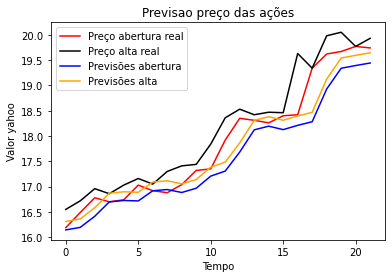

In [20]:
plt.plot(preco_real_open, color ='red', label = 'Preço abertura real')
plt.plot(preco_real_high, color ='black', label = 'Preço alta real')

plt.plot(previsoes[:, 0], color = 'blue', label = 'Previsões abertura')
plt.plot(previsoes[:, 1], color = 'orange', label = 'Previsões alta')


plt.title('Previsao preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor yahoo')
plt.legend()
plt.show()